### Import libraries 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm

The big disadvantage of using the normal equations is the complexity of finding the inverse of $X^T X$ which can be arbitrary huge depending on the data on the training set. A pretty preferrrable approach is using gradient descent which tracks the decrease on the loss function and moves towards it. 

### Generated random data

Use the diabetes data offered by skicit learn 

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Use 50 data points
X = diabetes_X[0:50]

# The true value of y
y = diabetes.target[0:50]


### Plot the data 


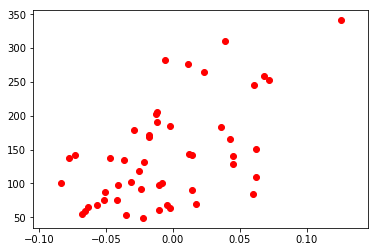

In [3]:
plt.scatter(X, y,  color='red')
plt.show()

The length of training and testing 

In [4]:
print ("The length of the data set " , len(X))

The length of the data set  50


### Insert columns of 1's
In order to rewrite $X\theta+b$ to $X\theta$ hence we don't need to worry about the bias term 

In [5]:
X=np.insert(X, 0, values=1.0, axis=1)

### Initialize the parameters 

In [6]:
M = X.shape[0]
N = X.shape[1]

theta = np.random.randn(N)
print(X.shape)
print(y.shape)
print(theta.shape)

(50, 2)
(50,)
(2,)


### Loss function 

$$L(\theta) = \frac{1}{2} \sum_{i=1}^m ||y^{(i)}-x^{(i)}\theta^T||^2$$

In a vectorized notation we have 

$$L(\theta) = \frac{1}{2} \left(y-X\theta \right)^T \left(y-X\theta \right)$$

In [7]:
def ssd(X,y,theta):
    return norm(y-X.dot(theta))/2

In [8]:
print(ssd(X,y,theta))

563.829518367


### Gradient of the hyper-parameters 

Note the loss function can be written 

$$L(\theta) = \frac{1}{2} \left(y^Ty-\theta^TX^Ty-yX\theta+\theta^T X^TX \theta \right)$$

By taking the gradient with respect to the parameters 

$$\frac{\partial L}{\partial \theta} = \frac{1}{2} \left(-2X^Ty +2X^TX \theta \right) $$

Which simplifies to the following 

$$\frac{\partial L}{\partial \theta}= X^T \left(X \theta -y \right)$$



In [9]:
def SGD (gradient , theta  , lrate):
    return theta - gradient * lrate

In [55]:
def sgd_momentum(gradient, theta, v , lrate , m = 0.9):
    v = m*v-lrate*gradient
    theta = theta+v
    return theta , v 

In [57]:
def rmsprop(gradient, theta, v , lrate ,cache, m = 0.9 , eps = 1e-8, dr =0.99 ):
    cache  = dr * cache + (1-dr) * gradient**2
    theta = theta - lrate * gradient / (np.sqrt(cache)+eps)
    return theta , cache 

### Training

In [68]:
def train(X,theta,y,itr = 1000 , lrate = 1e-2):
    sgd_loss  = [] 
    sgdm_loss = []
    rmsprop_loss = []
    v = np.zeros(theta.shape)
    cache = np.zeros(theta.shape)
    for j in range(0, itr):
        f = X.dot(theta)
        gradient = (X.T).dot(f - y)
        theta = SGD(gradient , theta  , lrate)
        theta_m , v = sgd_momentum(gradient, theta, v , lrate ) 
        theta_rmsprop , cache = rmsprop(gradient, theta, v , lrate ,cache)
        if j % 100 == 0:
            loss = ssd(X,y,theta)
            sgd_loss.append(loss)
            loss = ssd(X,y,theta_m)
            sgdm_loss.append(loss)
            loss = ssd(X,y,theta_rmsprop)
            rmsprop_loss.append(loss)
    epoch = range(0,len(sgd_loss))
    #plt.plot(epoch,sgd_loss)
    plt.plot(epoch,sgdm_loss)
    plt.plot(epoch,rmsprop_loss)
    plt.show()
    return theta 

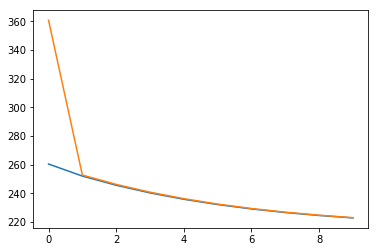

In [69]:
thetahat = train(X,theta,y)

### Prediction 

Note that 

$$\hat{y} = X \hat{\theta}$$

In [14]:
yhat = X.dot(thetahat)

### Plot the regression solution 

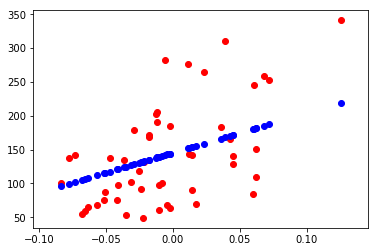

In [15]:
plt.scatter(X[:, 1], y,  color='red')
plt.scatter(X[:, 1], yhat,  color='blue')

plt.show()

Note the line becomes less senstive to outliers 